In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
df = pd.read_csv('times.csv')

In [16]:
df = df.iloc[:, 1:]
df

,solved,time,date,puzzle_id
0,True,83,2023/01/01,20818
1,True,218,2023/01/02,20830
2,True,139,2023/01/03,20711
3,True,44,2023/01/04,20527
4,True,165,2023/01/05,20750
...,...,...,...,...
360,True,131,2023/12/27,21642
361,True,171,2023/12/28,21643
362,True,49,2023/12/29,21641
363,True,249,2023/12/30,21651


In [17]:
df = df[df['solved'] == True]

In [18]:
times_df = df[['time', 'date']]

<Axes: xlabel='date'>

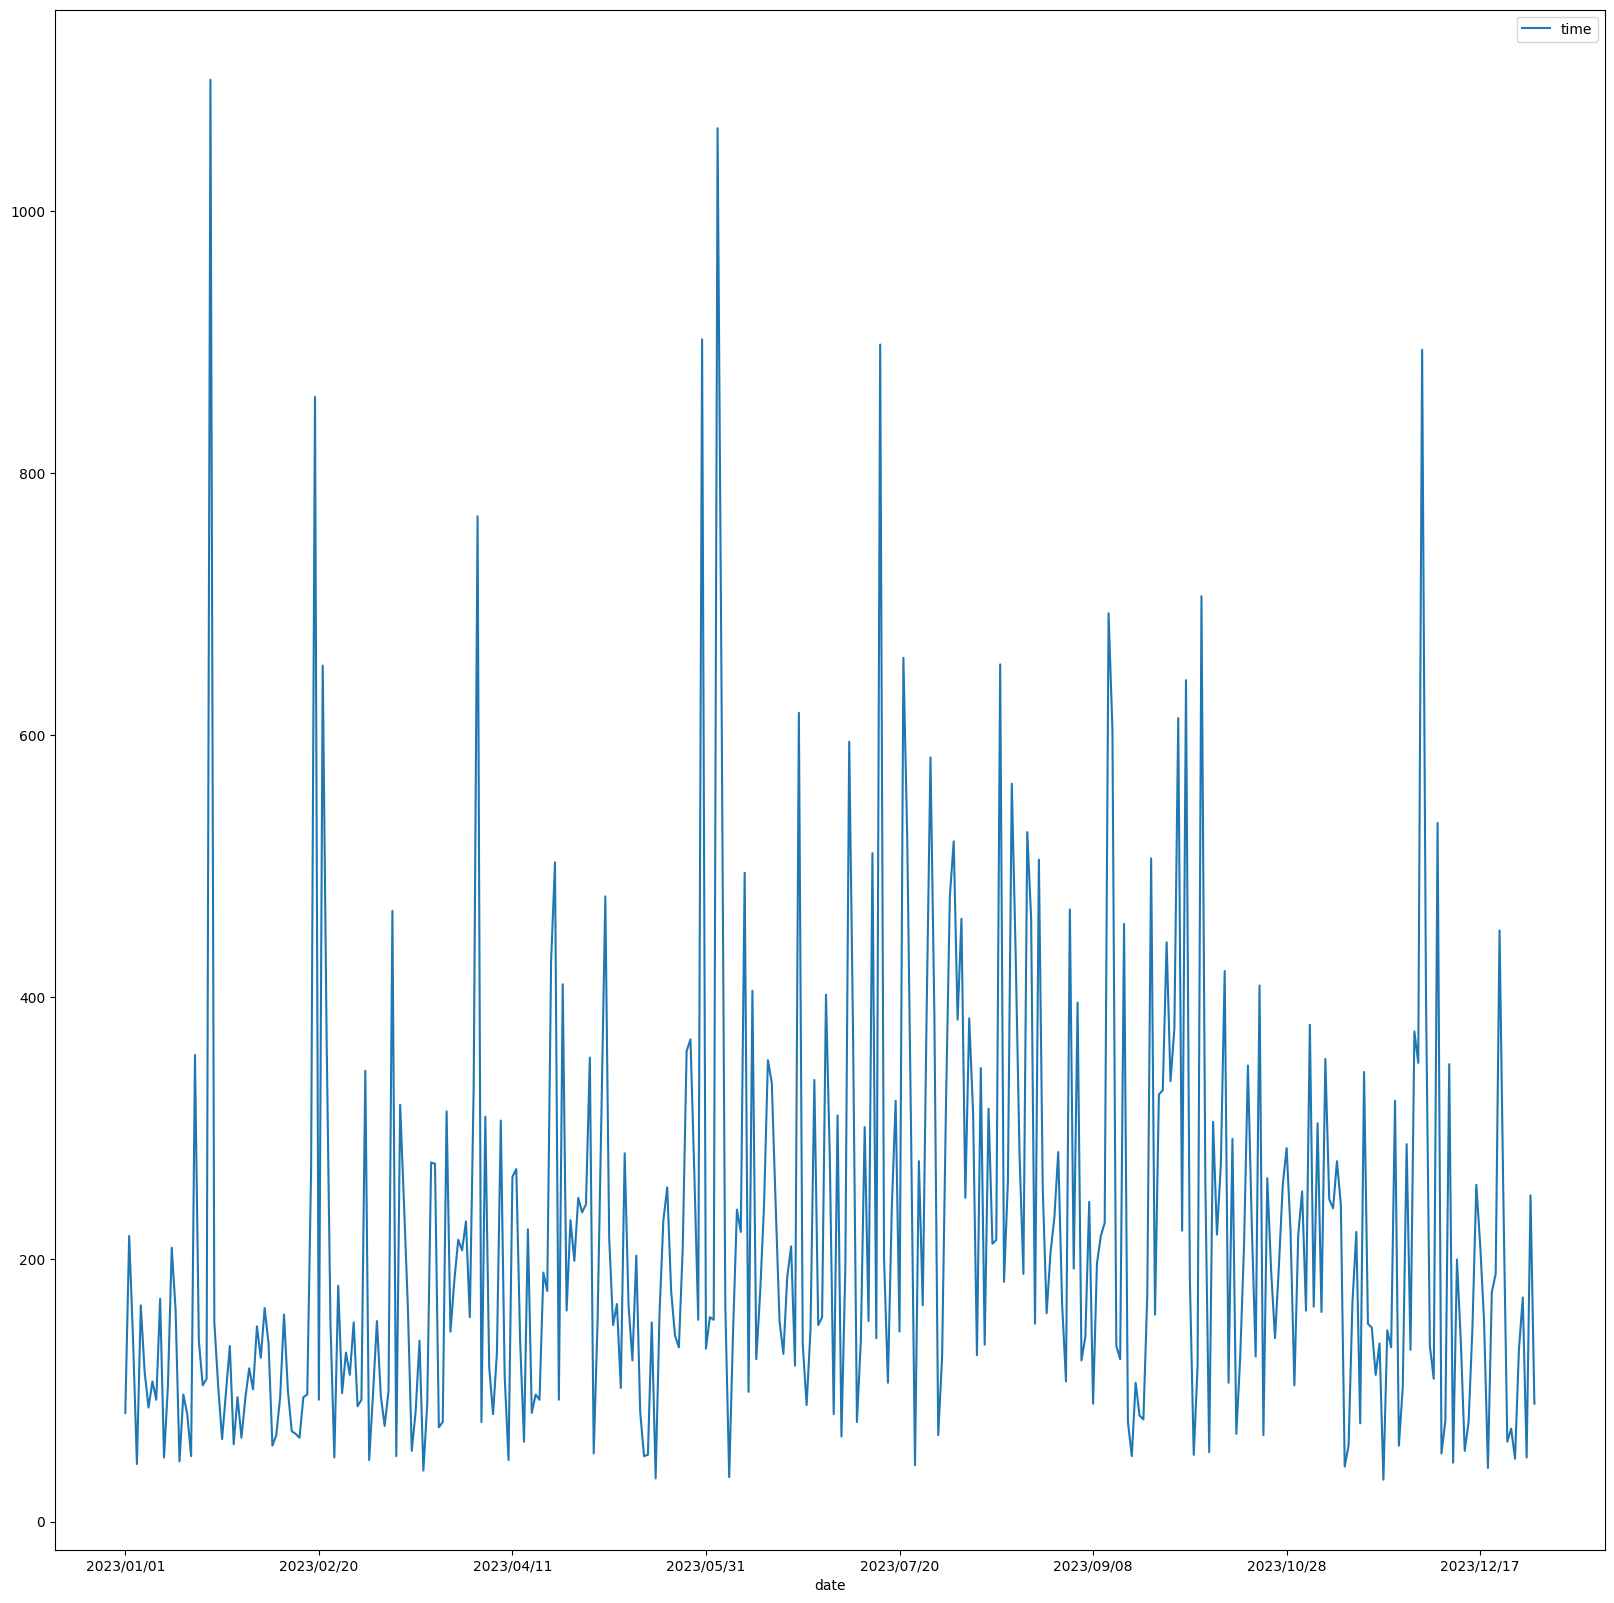

In [20]:
times_df.plot(kind = 'line', x='date' , y = 'time', figsize= (20,20))

### Im actually just cheeks at the mini wtf, the 1000+ seconds solve times are most likely due to me leaving it on using my phone, im not exactly sure


In [29]:



# high end matters more honselt  
lo_q, hi_q = 0.01, 0.91

t = times_df.copy()
t["date"] = pd.to_datetime(t["date"], format="%Y/%m/%d", errors="coerce")
t["time"] = pd.to_numeric(t["time"], errors="coerce")
t = t.dropna(subset=["date", "time"])
t["month"] = t["date"].dt.to_period("M").astype(str)

# normalize per-month by clipping to each months percentile bounds via winsorization
bounds = t.groupby("month")["time"].quantile([lo_q, hi_q]).unstack()
bounds.columns = ["lo", "hi"]
t = t.join(bounds, on="month")
t["time_norm"] = t["time"].clip(lower=t["lo"], upper=t["hi"])

# monthly table
monthly_table = (
    t.groupby("month")
     .agg(
         n=("time", "size"),
         avg_seconds=("time", "mean"),
         avg_seconds_norm=("time_norm", "mean"),
     )
     .reset_index()
     .sort_values("month")
)

# yearly averages 
print(f"Yearly average (raw):        {t['time'].mean():.2f} sec")
print(f"Yearly average (normalized): {t['time_norm'].mean():.2f} sec")

monthly_table


Yearly average (raw):        223.54 sec
Yearly average (normalized): 207.23 sec


,month,n,avg_seconds,avg_seconds_norm
0,2023-01,31,148.129032,114.635484
1,2023-02,28,168.428571,136.326429
2,2023-03,31,162.322581,156.448387
3,2023-04,30,220.633333,205.870667
4,2023-05,31,213.161290,191.974194
5,2023-06,30,257.100000,234.456333
6,2023-07,31,291.193548,278.754839
7,2023-08,31,321.032258,315.312903
8,2023-09,30,268.833333,259.840000
9,2023-10,31,235.612903,218.500000


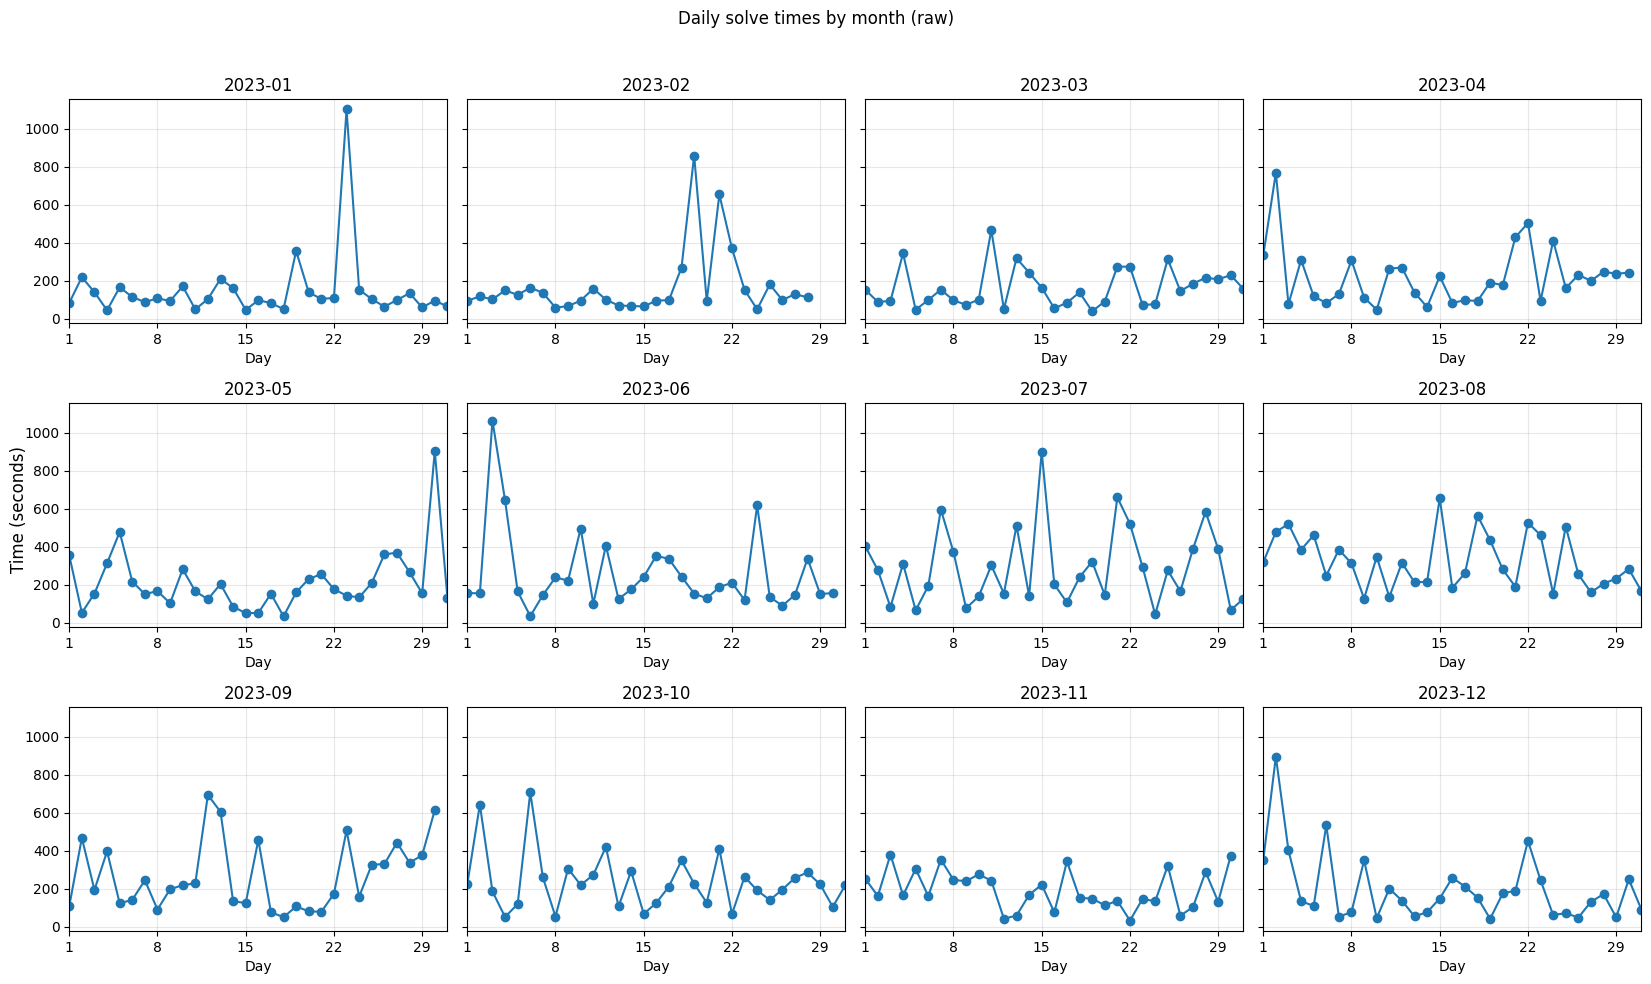

In [30]:


t_plot = t.copy()
t_plot["day"] = t_plot["date"].dt.day
months = sorted(t_plot["month"].unique())

n = len(months)
cols = 4  # rando
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4.2, rows * 3.2), sharey=True)
axes = axes.flatten()

for i, m in enumerate(months):
    ax = axes[i]
    g = t_plot[t_plot["month"] == m].sort_values("date")
    ax.plot(g["day"], g["time"], marker="o", linestyle="-")
    ax.set_title(m)
    ax.set_xlabel("Day")
    ax.grid(True, alpha=0.3)
    ax.set_xlim(1, 31)
    ax.set_xticks([1, 8, 15, 22, 29])  # fewer ticks so it stays readable

# hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

fig.supylabel("Time (seconds)")
fig.suptitle("Daily solve times by month (raw)", y=1.02)
plt.tight_layout()
plt.show()

### In Conclusion, in 2023 my times were pretty damn rough. Need to go back to complete a month i missed in 2024 and same for 2025


